<a href="https://colab.research.google.com/github/smithkanzariya/Cat_AND_Dog_Classifier/blob/master/Cat_AND_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#Importing necessary libraries
import numpy as np 
import keras 
from keras import backend as K 
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools

In [65]:
train_path = "/content/drive/My Drive/Cats-and-dogs/train"
test_path = "/content/drive/My Drive/Cats-and-dogs/test"
valid_path = "/content/drive/My Drive/Cats-and-dogs/valid"

In [66]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (224, 224), classes= ["dog", "cat"], batch_size= 10) 
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224, 224), classes= ["dog", "cat"], batch_size= 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (224, 224), classes= ["dog", "cat"], batch_size= 4)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [67]:

#plots images with label
def plots(ims, figsize = (12, 6), rows = 1, interp = False, titles = None):
    if type(ims[0]) is np.ndarray([]):
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)// rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("off")
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation = None if interp else "none")


In [68]:
imgs, lables = next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input dat

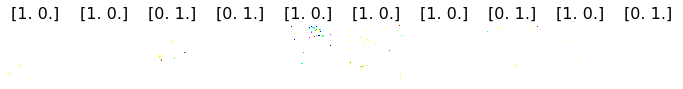

In [69]:
plots(imgs, titles = lables)

Build and Train CNN


In [70]:
model = Sequential([
                   Conv2D(32, (3, 3,),activation="relu", input_shape = (224, 224, 3)),
                   Flatten(),
                   Dense(2, activation="softmax")

])

In [71]:
model.compile(optimizer = Adam(lr = 0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [72]:
model.fit_generator(train_batches, steps_per_epoch= 4, validation_data= valid_batches, validation_steps= 4, epochs= 5, verbose=2)

Epoch 1/5
4/4 - 1s - loss: 1443.8782 - accuracy: 0.5000 - val_loss: 1400.0977 - val_accuracy: 0.5625
Epoch 2/5
4/4 - 1s - loss: 1838.0320 - accuracy: 0.5000 - val_loss: 349.8557 - val_accuracy: 0.5000
Epoch 3/5
4/4 - 1s - loss: 1015.2502 - accuracy: 0.4250 - val_loss: 1575.0394 - val_accuracy: 0.5625
Epoch 4/5
4/4 - 1s - loss: 541.3400 - accuracy: 0.6500 - val_loss: 736.7402 - val_accuracy: 0.4375
Epoch 5/5
4/4 - 1s - loss: 507.5872 - accuracy: 0.6250 - val_loss: 387.0554 - val_accuracy: 0.4375


Predict

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input dat

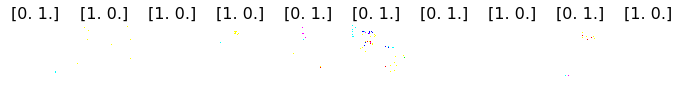

In [73]:
test_img , test_label = next(test_batches)
plots(test_img, titles=test_label)

In [74]:
test_label = test_label[:, 0]

In [75]:
prediction = model.predict_generator(test_batches, steps=1, verbose=0)

In [76]:
prediction


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [77]:
test_label

array([0., 1., 1., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)

In [78]:
cm = confusion_matrix(test_label, prediction[:, 0])

In [79]:
def plot_confusion_matrix(cm, classes, normalize = False, title= "Confusion Matrix", cmap=plt.cm.get_cmap('Reds')):
  plt.imshow(cm, interpolation="nearest", cmap= cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix without normalization")

  print(cm)

  thresh = cm.max() / 2
  for d , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, d, cm[d, j],
             horizontalalignment='center', 
             color = "white" if cm[d, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix without normalization
[[2 3]
 [5 0]]


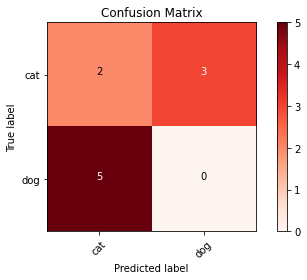

In [80]:
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm, cm_plot_labels)

Build Fine tuned VGG-16 model


In [81]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [82]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [83]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [84]:
model = Sequential()
for layer in vgg16_model.layers[:-1]: 
    model.add(layer)

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [86]:
# Freeze the layers 
for layer in model.layers:
    layer.trainable = False

In [87]:
model.add(Dense(2, activation="softmax"))

In [88]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Train the fine-tuned VGG16 model

In [90]:
model.compile(optimizer= Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics=["accuracy"])

In [91]:
model.fit_generator(train_batches, steps_per_epoch= 4, 
                    validation_data= valid_batches, validation_steps= 4, epochs= 8, verbose=2)

Epoch 1/8
4/4 - 24s - loss: 1.2958 - accuracy: 0.3750 - val_loss: 1.3345 - val_accuracy: 0.3125
Epoch 2/8
4/4 - 24s - loss: 0.9137 - accuracy: 0.5500 - val_loss: 1.0205 - val_accuracy: 0.4375
Epoch 3/8
4/4 - 24s - loss: 0.6438 - accuracy: 0.7250 - val_loss: 0.5984 - val_accuracy: 0.6250
Epoch 4/8
4/4 - 24s - loss: 0.4585 - accuracy: 0.8000 - val_loss: 0.5264 - val_accuracy: 0.6250
Epoch 5/8
4/4 - 24s - loss: 0.3373 - accuracy: 0.8000 - val_loss: 0.3201 - val_accuracy: 0.8125
Epoch 6/8
4/4 - 24s - loss: 0.2458 - accuracy: 0.8750 - val_loss: 0.3543 - val_accuracy: 0.8750
Epoch 7/8
4/4 - 24s - loss: 0.1820 - accuracy: 0.9500 - val_loss: 0.2576 - val_accuracy: 0.8750
Epoch 8/8
4/4 - 24s - loss: 0.1417 - accuracy: 1.0000 - val_loss: 0.2198 - val_accuracy: 0.9375


Predict using VGG16 model


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


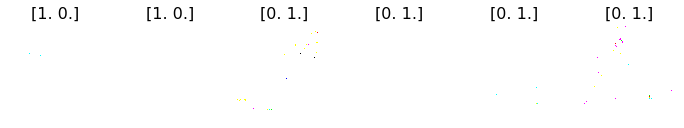

In [92]:
test_img , test_label = next(test_batches)
plots(test_img, titles=test_label)

In [93]:
test_label = test_label[:, 0]
test_label 

array([1., 1., 0., 0., 0., 0.], dtype=float32)

In [96]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [107]:
prediction[:6, 0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [102]:
test_label


array([1., 1., 0., 0., 0., 0.], dtype=float32)

In [108]:
cm = confusion_matrix(test_label, prediction[:6, 0])

Confusion matrix without normalization
[[4 0]
 [1 1]]


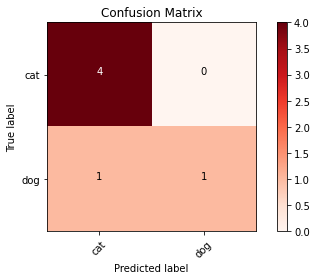

In [109]:
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm, cm_plot_labels)